In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data ()  #array정보로 데이터 읽어오기

In [53]:
print (X_train.shape)
print (X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [54]:
print (y_train.shape)
print (y_test.shape)

(60000,)
(10000,)


In [0]:
# tensor 변환 및 전환 tensor에 맞게 데이터 변환
import numpy as np
X_train = X_train.reshape (X_train.shape[0], 28, 28, 1).astype (np.float32) / 255   #0~255 인데 이것을 255로 나누었기때문에 범주가 0~1로
X_test = X_test.reshape (X_test.shape[0], 28, 28, 1).astype (np.float32) / 255

In [0]:
# Class label One hot encoding (이미 tensor 변환된 데이터를 이용하여 수치형 데이터를 범주형데이터로 바꿈)


from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [57]:
y_train.shape    #(samples, labels)

(60000, 10)

In [58]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [0]:
model = models.Sequential()

model.add(layers.Conv2D (32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

model.add(layers.Conv2D (64, (3, 3), activation = 'relu'))

model.add(layers.MaxPooling2D (pool_size = 2))
          
model.add(layers.Dropout(0.25))
          
model.add(layers.Flatten())
          
model.add(layers.Dense (128,activation = 'relu'))
          
model.add(layers.Dropout (0.5))
          
model.add(layers.Dense (10,activation = 'softmax'))
          
          
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
# early stopping 관련 call back 만들기 
#ModelCheckpoint 콜백 함수는 Keras에서 모델을 학습할 때마다 중간중간에 콜백 형태로 알려줍니다


model_path ="/content/drive/My Drive/Colab_myworks/models/{epoch:02d}-{val_loss:.4f}.hdf5"
check_pointer = ModelCheckpoint(filepath = model_path, monitor = 'val_loss'
                               , verbose = 1, save_best_only = True)
early_stopper = EarlyStopping (monitor = 'val_loss', patience = 10)

In [63]:
history = model.fit (X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopper, check_pointer])


Epoch 00001: val_loss improved from inf to 0.05759, saving model to /content/drive/My Drive/Colab_myworks/models/01-0.0576.hdf5

Epoch 00002: val_loss improved from 0.05759 to 0.04190, saving model to /content/drive/My Drive/Colab_myworks/models/02-0.0419.hdf5

Epoch 00003: val_loss improved from 0.04190 to 0.03456, saving model to /content/drive/My Drive/Colab_myworks/models/03-0.0346.hdf5

Epoch 00004: val_loss did not improve from 0.03456

Epoch 00005: val_loss improved from 0.03456 to 0.03239, saving model to /content/drive/My Drive/Colab_myworks/models/05-0.0324.hdf5

Epoch 00006: val_loss improved from 0.03239 to 0.03042, saving model to /content/drive/My Drive/Colab_myworks/models/06-0.0304.hdf5

Epoch 00007: val_loss improved from 0.03042 to 0.02835, saving model to /content/drive/My Drive/Colab_myworks/models/07-0.0284.hdf5

Epoch 00008: val_loss did not improve from 0.02835

Epoch 00009: val_loss improved from 0.02835 to 0.02707, saving model to /content/drive/My Drive/Colab

In [64]:
model.evaluate (X_test, y_test)[1]

10000/10000 [==============================] - 1s 53us/step


0.9933

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
y_val_loss = history.history['val_loss']

In [0]:
y_loss = history.history['loss']

In [0]:
x_epoch = np.arange (len(y_loss))

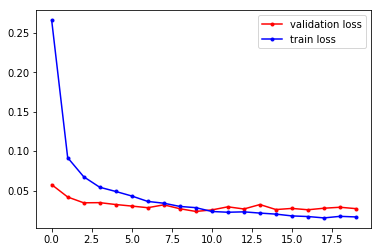

In [69]:
plt.plot(x_epoch, y_val_loss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_epoch, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()